In this week's independent project, you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time by solving for the following research question;

Research Question

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.


# DATA PREPARATION

In [121]:
# Importing Libraries we could use in the analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
# Loading the dataset into the environment
Autolib = pd.read_csv('Autolib_dataset (2).csv')
Autolib

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


In [123]:
Autolib.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [124]:
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

# DATA CLEANING

## BLUE CAR ONLY

In [125]:
# Checking if the Cars and Blue_Counter columns hold the same values.

Autolib_Check = Autolib.Cars == Autolib['Bluecar counter']
Autolib_Check.describe()
# As expected, they do, so we can drop the Cars column.

count     5000
unique       1
top       True
freq      5000
dtype: object

In [126]:
# Checking the relationship between ID, Public name, Postal code and Address
print(Autolib.ID.describe())
print(Autolib['Public name'].describe())

print(Autolib['Postal code'].value_counts())
Autolib.Address.describe()
# ID corresponds to Public name. They both correspond to Address but there seems to be 1 outlier.
# Postal code seems to be different from the above.

# We'll drop ID and Public Name regardless, as we want to know the Addresses and Postal Codes.

count                         5000
unique                        1105
top       paris-portedemontrouge-8
freq                            13
Name: ID, dtype: object
count                           5000
unique                          1105
top       Paris/Porte de Montrouge/8
freq                              13
Name: Public name, dtype: object
75015    274
75016    236
75017    221
75011    180
75020    169
        ... 
93300      5
92110      4
91400      4
93310      4
94100      2
Name: Postal code, Length: 107, dtype: int64


count                                  5000
unique                                 1104
top       8 Avenue de la Porte de Montrouge
freq                                     13
Name: Address, dtype: object

In [127]:
# Dropping unrequired columns

Bluecar = Autolib.drop(['Cars','Utilib counter','Utilib 1.4 counter','Displayed comment','ID','Kind','Geo point','Public name','Subscription status'], axis=1)
Bluecar.head()

,Address,Bluecar counter,Charge Slots,Charging Status,City,Postal code,Rental status,Scheduled at,Slots,Station type,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,nonexistent,Paris,75015,operational,NaN,2,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,operational,Paris,75014,operational,NaN,0,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,operational,Le Bourget,93350,operational,NaN,1,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,operational,Paris,75013,operational,NaN,2,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,nonexistent,Paris,75017,operational,NaN,3,station,ok,2018,4,8,17,23


In [128]:
Bluecar.columns = Bluecar.columns.str.replace(' ', '_')

In [ ]:
# We need to convert the days and time to datetime for easier Analysis
# First let's convert them to objects i.e. strings
print(Bluecar.info())

Bluecar.year = Bluecar.year.astype(str)
Bluecar.month = Bluecar.month.astype(str)
Bluecar.day = Bluecar.day.astype(str)

Bluecar.hour = Bluecar.hour.astype(str)
Bluecar.minute = Bluecar.minute.astype(str)

Bluecar.info()

In [130]:
Bluecar.head()

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,nonexistent,Paris,75015,operational,NaN,2,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,operational,Paris,75014,operational,NaN,0,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,operational,Le Bourget,93350,operational,NaN,1,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,operational,Paris,75013,operational,NaN,2,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,nonexistent,Paris,75017,operational,NaN,3,station,ok,2018,4,8,17,23


In [131]:
# Next we concatenate them

Blue = Bluecar['year'] + Bluecar['month'] + Bluecar['day']
print(Blue.head())
Test = pd.to_datetime(Blue, format='%Y%m%d', errors='ignore')
print(Test.head())

Time = Bluecar.hour + Bluecar.minute
print(Time.head())

Time_Test = pd.to_datetime(Time, format= '%H%M').dt.time # option 1 gives dtype as object, which will be hard to work with in calculations
print(Time_Test.head())

Time_Test2 = pd.to_datetime(Time, format= '%H%M')- pd.to_datetime(Time, format='%H%M').dt.normalize()
Time_Test2 # option 2 is better due to the datatype timedelta.

0    201848
1    201846
2    201843
3    201844
4    201848
dtype: object
0   2018-04-08
1   2018-04-06
2   2018-04-03
3   2018-04-04
4   2018-04-08
dtype: datetime64[ns]
0    1143
1     724
2    2014
3     437
4    1723
dtype: object
0    11:43:00
1    07:24:00
2    20:14:00
3    04:37:00
4    17:23:00
dtype: object


0      0 days 11:43:00
1      0 days 07:24:00
2      0 days 20:14:00
3      0 days 04:37:00
4      0 days 17:23:00
             ...      
4995   0 days 11:26:00
4996   0 days 16:56:00
4997   0 days 07:01:00
4998   0 days 17:27:00
4999   0 days 10:02:00
Length: 5000, dtype: timedelta64[ns]

In [132]:
Bluecar.head()

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,nonexistent,Paris,75015,operational,NaN,2,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,operational,Paris,75014,operational,NaN,0,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,operational,Le Bourget,93350,operational,NaN,1,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,operational,Paris,75013,operational,NaN,2,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,nonexistent,Paris,75017,operational,NaN,3,station,ok,2018,4,8,17,23


In [133]:
# After Analysis, it's better to convert only the Year Month and Days to Date_Time and leave the hours as is.
# Furthermore, since the analysis is on hours, the minute column can be dropped.

Bluecar.hour = Bluecar.hour.astype(int)
Bluecar.minute = Bluecar.minute.astype(int)
Bluecar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          5000 non-null   object
 1   Bluecar_counter  5000 non-null   int64 
 2   Charge_Slots     5000 non-null   int64 
 3   Charging_Status  5000 non-null   object
 4   City             5000 non-null   object
 5   Postal_code      5000 non-null   int64 
 6   Rental_status    5000 non-null   object
 7   Scheduled_at     47 non-null     object
 8   Slots            5000 non-null   int64 
 9   Station_type     5000 non-null   object
 10  Status           5000 non-null   object
 11  year             5000 non-null   object
 12  month            5000 non-null   object
 13  day              5000 non-null   object
 14  hour             5000 non-null   int64 
 15  minute           5000 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 625.1+ KB


In [134]:
Bluecar['Date'] = Test
Bluecar.head()

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,year,month,day,hour,minute,Date
0,2 Avenue de Suffren,0,0,nonexistent,Paris,75015,operational,NaN,2,station,ok,2018,4,8,11,43,2018-04-08
1,145 Rue Raymond Losserand,6,0,operational,Paris,75014,operational,NaN,0,station,ok,2018,4,6,7,24,2018-04-06
2,2 Avenue John Fitzgerald Kennedy,3,0,operational,Le Bourget,93350,operational,NaN,1,station,ok,2018,4,3,20,14,2018-04-03
3,51 Rue EugÃ¨ne OudinÃ©,3,1,operational,Paris,75013,operational,NaN,2,station,ok,2018,4,4,4,37,2018-04-04
4,6 avenue de la Porte de Champerret,3,0,nonexistent,Paris,75017,operational,NaN,3,station,ok,2018,4,8,17,23,2018-04-08


In [135]:
# We can now drop year, month and day columns
# Additionally, since the analysis is on hours, the minute column can be dropped.

Bluecar.drop(['year', 'month', 'day', 'minute'], axis=1, inplace= True)
Bluecar.head()

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,hour,Date
0,2 Avenue de Suffren,0,0,nonexistent,Paris,75015,operational,NaN,2,station,ok,11,2018-04-08
1,145 Rue Raymond Losserand,6,0,operational,Paris,75014,operational,NaN,0,station,ok,7,2018-04-06
2,2 Avenue John Fitzgerald Kennedy,3,0,operational,Le Bourget,93350,operational,NaN,1,station,ok,20,2018-04-03
3,51 Rue EugÃ¨ne OudinÃ©,3,1,operational,Paris,75013,operational,NaN,2,station,ok,4,2018-04-04
4,6 avenue de la Porte de Champerret,3,0,nonexistent,Paris,75017,operational,NaN,3,station,ok,17,2018-04-08


### Outliers

In [136]:
# From the data below, the max values of Bluecar_counter, Charge_slots and slots seems to be far 
# from the rest of the data. Futhermore they're far from the 75th percentile. further investigation 
# should be done to see if they affect the data.
# Values for Postal_code and hours do not count in this, as they are uniquely standardized units.

Bluecar.describe()

,Bluecar_counter,Charge_Slots,Postal_code,Slots,hour
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.333600,0.253400,82634.878400,1.932400,11.509200
std,2.035274,0.546304,8835.865721,1.905402,6.893549
min,0.000000,0.000000,75001.000000,0.000000,0.000000
25%,0.000000,0.000000,75012.000000,0.000000,6.000000
50%,2.000000,0.000000,75019.000000,1.000000,11.000000
75%,4.000000,0.000000,92320.000000,3.000000,18.000000
max,7.000000,2.000000,95880.000000,7.000000,23.000000


In [137]:
# From the data below, the max value seems to be far from the rest of the data It's far 
# from the 75th percentile, further investigation should be done to see if it affects the data 
Bluecar.hour.value_counts()
# This gives us a hint that 21:00 hrs could be the most popular hour. this will be investigated
# during data analysis.

21    237
9     221
16    220
7     219
6     219
3     218
2     218
13    213
8     211
5     211
11    210
18    210
19    208
14    207
20    202
23    201
12    200
15    200
4     199
17    198
22    196
1     194
10    194
0     194
Name: hour, dtype: int64

In [180]:
# First we'll store a copy of the original in order to manipulate the data and still have a copy of
# the original to compare results with

Blue = Bluecar.copy(deep=True)
Blue.head()

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,hour,Date
123,35 rue Mathis,0,0,nonexistent,Paris,75019,operational,NaN,4,station,ok,0,2018-04-01
459,170 boulevard Pereire,3,0,operational,Paris,75017,operational,NaN,1,station,ok,0,2018-04-01
978,2 Rue Fabre d'Ãglantine,2,1,operational,Paris,75012,operational,NaN,2,station,ok,0,2018-04-01
1026,12 Avenue de Messine,4,0,operational,Paris,75008,operational,NaN,1,station,ok,0,2018-04-01
1046,112 Rue Monge BÃ¢timent Lieu-dit,0,0,nonexistent,Paris,75005,operational,NaN,4,station,ok,0,2018-04-01


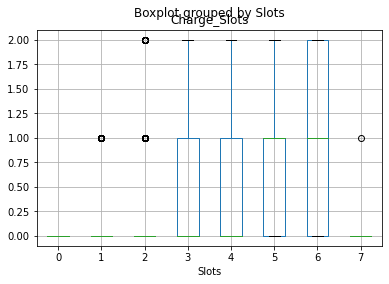

In [139]:
# Bluecar.boxplot(column='Bluecar_counter', by='hour')
# Bluecar.boxplot(column='Charge_Slots', by='hour')
# Bluecar.boxplot(column='Slots', by='hour')
# Bluecar.boxplot(column='Bluecar_counter', by='Charge_Slots') # There's outliers here.
# Bluecar.boxplot(column='Bluecar_counter', by='Slots') # There's outliers here.
Bluecar.boxplot(column='Charge_Slots', by='Slots') # There's outliers here. 

# DATA ANALYSIS

## BLUECAR ONLY

### With Possible Outliers


In [184]:
# We will only be working with Paris.

Blue = Blue[Blue.City == 'Paris']
Blue.head()

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,hour,Date
3342,1 Rue Navier,5,0,operational,Paris,75017,operational,NaN,0,station,ok,0,2018-04-01
4357,11 rue Marguerite Long,3,0,operational,Paris,75017,operational,NaN,3,station,ok,0,2018-04-01
1046,112 Rue Monge BÃ¢timent Lieu-dit,0,0,nonexistent,Paris,75005,operational,NaN,4,station,ok,0,2018-04-01
4934,115 avenue de Malakoff,4,0,nonexistent,Paris,75016,operational,NaN,1,station,ok,0,2018-04-01
1026,12 Avenue de Messine,4,0,operational,Paris,75008,operational,NaN,1,station,ok,0,2018-04-01


In [186]:
# Sorting the table in order of days ascending.
Blue = Blue.sort_values(by=['Address', 'Date', 'hour'])
Blue

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,hour,Date
299,1 Avenue Gambetta,0,1,operational,Paris,75020,operational,NaN,5,station,ok,15,2018-04-01
1940,1 Avenue Gambetta,0,1,operational,Paris,75020,operational,NaN,6,station,ok,20,2018-04-07
4486,1 Avenue Gambetta,3,1,operational,Paris,75020,operational,NaN,3,station,ok,13,2018-04-09
962,1 Avenue Marceau,1,0,operational,Paris,75016,operational,NaN,0,station,ok,16,2018-04-01
4850,1 Avenue Marceau,0,0,operational,Paris,75016,operational,NaN,5,station,ok,6,2018-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,99 Boulevard Arago,3,0,nonexistent,Paris,75014,operational,NaN,1,station,ok,11,2018-04-06
3222,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,1,station,ok,21,2018-04-06
2719,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,2,station,ok,12,2018-04-08
2392,99 Rue Monge,0,1,operational,Paris,75005,operational,NaN,5,station,ok,1,2018-04-01


In [206]:
#Taken ['taken'] = Taken['Bluecar_counter'] - Taken['Bluecar_counter'].shift(-1)
#Taken
#def negative(x):
#  if x < 0:
#    z = 0
#  else:
#    z = x
#  return z
#Blue['taken_1'] = Blue.apply(lambda row: negative(row['taken']), axis=1)
Engaged_Addresses = Blue.copy(deep=True)
Engaged_Addresses = Engaged_Addresses[Engaged_Addresses['Address'] == Engaged_Addresses['Address'].shift(1)] # If the address below is equal to the current address 

Engaged_Addresses.loc[Engaged_Addresses.Address == Engaged_Addresses.Address.shift(-1), 'taken'] = Engaged_Addresses['Bluecar_counter'] - Engaged_Addresses['Bluecar_counter'].shift(-1)
Engaged_Addresses.head()
# From this we notice that addresses that appear only once means no picking up of cars or returning was done.
# We can ignore these adresses as we have done above.
# taken Null values and negatives should be replaced with 0 since they mean no cars were picked.

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,hour,Date,taken
1940,1 Avenue Gambetta,0,1,operational,Paris,75020,operational,NaN,6,station,ok,20,2018-04-07,-3.0
4486,1 Avenue Gambetta,3,1,operational,Paris,75020,operational,NaN,3,station,ok,13,2018-04-09,NaN
4850,1 Avenue Marceau,0,0,operational,Paris,75016,operational,NaN,5,station,ok,6,2018-04-05,0.0
2547,1 Avenue Marceau,0,1,operational,Paris,75016,operational,NaN,5,station,ok,22,2018-04-05,0.0
3006,1 Avenue Marceau,0,1,operational,Paris,75016,operational,NaN,5,station,ok,6,2018-04-06,NaN


In [208]:
Engaged_Addresses.taken.fillna(0, inplace= True)
Engaged_Addresses.taken.value_counts()
# We can replace the negative values listed below.

 0.0    1116
 1.0     229
-1.0     215
 2.0     157
-2.0     153
 3.0      97
-3.0      75
 4.0      56
-4.0      43
-5.0      26
 5.0      22
 6.0      11
-6.0      10
-7.0       1
Name: taken, dtype: int64

In [211]:
Engaged_Addresses.taken = Engaged_Addresses.taken.replace([-1,-2,-3,-4,-5,-6,-7], 0)
Engaged_Addresses.taken.value_counts()
# Now we have the cars taken/ picked up.

0.0    1639
1.0     229
2.0     157
3.0      97
4.0      56
5.0      22
6.0      11
Name: taken, dtype: int64

#### Answering Questions posed on the CRISP-DM Document's Analysis Section
Per Day Analysis

In [222]:
# 1. The most popular day with the most rides.
Engaged_Addresses.groupby('Date')['taken'].sum().sort_values(ascending=False)


Date
2018-04-04    228.0
2018-04-05    215.0
2018-04-06    214.0
2018-04-03    203.0
2018-04-07    136.0
2018-04-02    110.0
2018-04-08     64.0
2018-04-09     48.0
2018-04-01     16.0
Name: taken, dtype: float64

In [223]:
# 2. The least popular day with the least rides.
Engaged_Addresses.groupby('Date')['taken'].sum().sort_values(ascending=True)

Date
2018-04-01     16.0
2018-04-09     48.0
2018-04-08     64.0
2018-04-02    110.0
2018-04-07    136.0
2018-04-03    203.0
2018-04-06    214.0
2018-04-05    215.0
2018-04-04    228.0
Name: taken, dtype: float64

#### Hours Analysis

In [268]:
# 1. The most popular hours (working or home hours).
# From the calendar weekends are 1st, 7th and 8th
# df[(df['Product'] == 'Sofa') & (df['MRP'] == 5000) & (df['Discount']== 20)] 
Engaged_hours = Engaged_Addresses.copy(deep= True)
Weekday_hours = Engaged_hours[((Engaged_hours.hour >= 8) & (Engaged_hours.hour <= 18)) & ((Engaged_hours.Date != '2018-04-01') & (Engaged_hours.Date != '2018-04-07') & (Engaged_hours.Date != '2018-04-08'))]
Weekday_hours.groupby('hour')['taken'].sum().sort_values(ascending=False)

hour
12    64.0
15    57.0
16    51.0
8     45.0
18    43.0
17    41.0
11    41.0
10    40.0
9     37.0
13    34.0
14    25.0
Name: taken, dtype: float64

In [269]:
Weekday_hours_night = Engaged_hours[((Engaged_hours.hour < 8) | (Engaged_hours.hour > 18)) & ((Engaged_hours.Date != '2018-04-01') & (Engaged_hours.Date != '2018-04-07') & (Engaged_hours.Date != '2018-04-08'))]
Weekday_hours_night.groupby('hour')['taken'].sum().sort_values(ascending=False)

hour
3     68.0
21    52.0
1     51.0
4     46.0
6     45.0
0     45.0
2     44.0
7     41.0
5     36.0
19    34.0
20    28.0
22    27.0
23    23.0
Name: taken, dtype: float64

In [270]:
# 2. The least popular hours (working or home hours) 
Weekday_hours.groupby('hour')['taken'].sum().sort_values(ascending=True)

hour
14    25.0
13    34.0
9     37.0
10    40.0
11    41.0
17    41.0
18    43.0
8     45.0
16    51.0
15    57.0
12    64.0
Name: taken, dtype: float64

In [271]:
Weekday_hours_night.groupby('hour')['taken'].sum().sort_values(ascending=True)

hour
23    23.0
22    27.0
20    28.0
19    34.0
5     36.0
7     41.0
2     44.0
0     45.0
6     45.0
4     46.0
1     51.0
21    52.0
3     68.0
Name: taken, dtype: float64

In [272]:
print('Day rides :', Weekday_hours.taken.sum())
print('Night rides :', Weekday_hours_night.taken.sum())

Day rides : 478.0
Night rides : 540.0


In [273]:
# The above was for weekdays
# Below, we'll consider weekends.
#Most popular hours day time.
Weekend_hours = Engaged_hours[((Engaged_hours.hour >= 8) & (Engaged_hours.hour <= 18)) & ((Engaged_hours.Date == '2018-04-01') | (Engaged_hours.Date == '2018-04-07') | (Engaged_hours.Date == '2018-04-08'))]
Weekend_hours.groupby('hour')['taken'].sum().sort_values(ascending= False)

hour
12    14.0
10    13.0
8     13.0
14    10.0
15     9.0
16     8.0
13     7.0
11     7.0
9      7.0
18     5.0
17     5.0
Name: taken, dtype: float64

In [274]:
#Most popular hours night time
Weekend_hours_night = Engaged_hours[((Engaged_hours.hour < 8) | (Engaged_hours.hour > 18)) & ((Engaged_hours.Date == '2018-04-01') | (Engaged_hours.Date == '2018-04-07') | (Engaged_hours.Date == '2018-04-08'))]
Weekend_hours_night.groupby('hour')['taken'].sum().sort_values(ascending= False)

hour
3     16.0
22    14.0
6     14.0
2     11.0
20     9.0
23     8.0
21     8.0
19     8.0
7      8.0
5      7.0
4      5.0
1      5.0
0      5.0
Name: taken, dtype: float64

In [275]:
#Least popular day hours
Weekend_hours.groupby('hour')['taken'].sum().sort_values(ascending= True)

hour
17     5.0
18     5.0
9      7.0
11     7.0
13     7.0
16     8.0
15     9.0
14    10.0
8     13.0
10    13.0
12    14.0
Name: taken, dtype: float64

In [276]:
#Least popular night hours
Weekend_hours_night.groupby('hour')['taken'].sum().sort_values(ascending= True)

hour
0      5.0
1      5.0
4      5.0
5      7.0
7      8.0
19     8.0
21     8.0
23     8.0
20     9.0
2     11.0
6     14.0
22    14.0
3     16.0
Name: taken, dtype: float64

In [307]:
print('Day rides: ', Weekend_hours.taken.sum())
print('Night rides: ', Weekend_hours_night.taken.sum())

Day rides:  98.0
Night rides:  118.0


In [278]:
a = Weekday_hours.taken.sum() + Weekend_hours.taken.sum()
b = Weekday_hours_night.taken.sum() + Weekend_hours_night.taken.sum()

print("Week's total day rides = ", a)
print("Week's total night rides = ", b)

Week's total day rides =  576.0
Week's total night rides =  658.0


In [279]:
Engaged_hours.groupby('hour')['taken'].sum().sort_values(ascending= True)

hour
23    31.0
14    35.0
20    37.0
13    41.0
22    41.0
19    42.0
5     43.0
9     44.0
17    46.0
18    48.0
11    48.0
7     49.0
0     50.0
4     51.0
10    53.0
2     55.0
1     56.0
8     58.0
6     59.0
16    59.0
21    60.0
15    66.0
12    78.0
3     84.0
Name: taken, dtype: float64

In [280]:
Engaged_hours.groupby('hour')['taken'].sum().sort_values(ascending= False)

hour
3     84.0
12    78.0
15    66.0
21    60.0
16    59.0
6     59.0
8     58.0
1     56.0
2     55.0
10    53.0
4     51.0
0     50.0
7     49.0
11    48.0
18    48.0
17    46.0
9     44.0
5     43.0
19    42.0
22    41.0
13    41.0
20    37.0
14    35.0
23    31.0
Name: taken, dtype: float64

In [284]:
Engaged_hours.Address.value_counts()

8 Avenue de la Porte de Montrouge    12
35 rue Mathis                        10
126 Avenue Philippe Auguste          10
182 Boulevard Voltaire               10
31 boulevard de Grenelle             10
                                     ..
243 rue Saint-Martin                  1
2 Rue PÃ©guy                          1
99 Rue Monge                          1
16 Rue Sofia                          1
58 Avenue D'Ivry                      1
Name: Address, Length: 578, dtype: int64

In [283]:
Engaged_hours

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,hour,Date,taken
1940,1 Avenue Gambetta,0,1,operational,Paris,75020,operational,NaN,6,station,ok,20,2018-04-07,0.0
4486,1 Avenue Gambetta,3,1,operational,Paris,75020,operational,NaN,3,station,ok,13,2018-04-09,0.0
4850,1 Avenue Marceau,0,0,operational,Paris,75016,operational,NaN,5,station,ok,6,2018-04-05,0.0
2547,1 Avenue Marceau,0,1,operational,Paris,75016,operational,NaN,5,station,ok,22,2018-04-05,0.0
3006,1 Avenue Marceau,0,1,operational,Paris,75016,operational,NaN,5,station,ok,6,2018-04-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,2,station,ok,4,2018-04-06,0.0
3282,99 Boulevard Arago,3,0,nonexistent,Paris,75014,operational,NaN,1,station,ok,11,2018-04-06,2.0
3222,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,1,station,ok,21,2018-04-06,0.0
2719,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,2,station,ok,12,2018-04-08,0.0


In [287]:
Test = Engaged_hours[Engaged_hours.Address == '8 Avenue de la Porte de Montrouge']
Test

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,hour,Date,taken
2179,8 Avenue de la Porte de Montrouge,1,2,operational,Paris,75014,operational,NaN,4,station,ok,19,2018-04-01,0.0
3558,8 Avenue de la Porte de Montrouge,5,0,operational,Paris,75014,operational,NaN,0,station,ok,3,2018-04-02,5.0
360,8 Avenue de la Porte de Montrouge,0,2,operational,Paris,75014,operational,NaN,5,station,ok,22,2018-04-02,0.0
4490,8 Avenue de la Porte de Montrouge,6,0,operational,Paris,75014,operational,NaN,0,station,ok,0,2018-04-04,6.0
2991,8 Avenue de la Porte de Montrouge,0,2,operational,Paris,75014,operational,NaN,6,station,ok,14,2018-04-05,0.0
1010,8 Avenue de la Porte de Montrouge,5,0,operational,Paris,75014,operational,NaN,0,station,ok,2,2018-04-06,1.0
1282,8 Avenue de la Porte de Montrouge,4,0,operational,Paris,75014,operational,NaN,0,station,ok,10,2018-04-07,1.0
3307,8 Avenue de la Porte de Montrouge,3,0,operational,Paris,75014,operational,NaN,0,station,ok,12,2018-04-08,0.0
1527,8 Avenue de la Porte de Montrouge,3,0,operational,Paris,75014,operational,NaN,0,station,ok,15,2018-04-08,2.0
194,8 Avenue de la Porte de Montrouge,1,1,operational,Paris,75014,operational,NaN,4,station,ok,16,2018-04-08,0.0


In [288]:
# 3. Returning hours

Engaged_hours.loc[Engaged_hours.Address == Engaged_hours.Address.shift(-1), 'returned'] = Engaged_hours['Bluecar_counter'] - Engaged_hours['Bluecar_counter'].shift(-1)
Engaged_hours[Engaged_hours.Address == '8 Avenue de la Porte de Montrouge'] # Preview after the subtraction operation above.

#From this we need only the negative numbers as they represent the returned cars.

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,hour,Date,taken,returned
2179,8 Avenue de la Porte de Montrouge,1,2,operational,Paris,75014,operational,NaN,4,station,ok,19,2018-04-01,0.0,-4.0
3558,8 Avenue de la Porte de Montrouge,5,0,operational,Paris,75014,operational,NaN,0,station,ok,3,2018-04-02,5.0,5.0
360,8 Avenue de la Porte de Montrouge,0,2,operational,Paris,75014,operational,NaN,5,station,ok,22,2018-04-02,0.0,-6.0
4490,8 Avenue de la Porte de Montrouge,6,0,operational,Paris,75014,operational,NaN,0,station,ok,0,2018-04-04,6.0,6.0
2991,8 Avenue de la Porte de Montrouge,0,2,operational,Paris,75014,operational,NaN,6,station,ok,14,2018-04-05,0.0,-5.0
1010,8 Avenue de la Porte de Montrouge,5,0,operational,Paris,75014,operational,NaN,0,station,ok,2,2018-04-06,1.0,1.0
1282,8 Avenue de la Porte de Montrouge,4,0,operational,Paris,75014,operational,NaN,0,station,ok,10,2018-04-07,1.0,1.0
3307,8 Avenue de la Porte de Montrouge,3,0,operational,Paris,75014,operational,NaN,0,station,ok,12,2018-04-08,0.0,0.0
1527,8 Avenue de la Porte de Montrouge,3,0,operational,Paris,75014,operational,NaN,0,station,ok,15,2018-04-08,2.0,2.0
194,8 Avenue de la Porte de Montrouge,1,1,operational,Paris,75014,operational,NaN,4,station,ok,16,2018-04-08,0.0,-2.0


In [290]:
Engaged_hours.returned.fillna(0, inplace= True)
Engaged_hours.returned.value_counts()

 0.0    1116
 1.0     229
-1.0     215
 2.0     157
-2.0     153
 3.0      97
-3.0      75
 4.0      56
-4.0      43
-5.0      26
 5.0      22
 6.0      11
-6.0      10
-7.0       1
Name: returned, dtype: int64

In [291]:
Engaged_hours.returned = Engaged_hours.returned.replace([1,2,3,4,5,6,7], 0)
Engaged_hours.returned.value_counts()

 0.0    1688
-1.0     215
-2.0     153
-3.0      75
-4.0      43
-5.0      26
-6.0      10
-7.0       1
Name: returned, dtype: int64

In [293]:
# Convert the negative values to positive values
Engaged_hours.returned = Engaged_hours.returned.abs()
Engaged_hours

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,hour,Date,taken,returned
1940,1 Avenue Gambetta,0,1,operational,Paris,75020,operational,NaN,6,station,ok,20,2018-04-07,0.0,3.0
4486,1 Avenue Gambetta,3,1,operational,Paris,75020,operational,NaN,3,station,ok,13,2018-04-09,0.0,0.0
4850,1 Avenue Marceau,0,0,operational,Paris,75016,operational,NaN,5,station,ok,6,2018-04-05,0.0,0.0
2547,1 Avenue Marceau,0,1,operational,Paris,75016,operational,NaN,5,station,ok,22,2018-04-05,0.0,0.0
3006,1 Avenue Marceau,0,1,operational,Paris,75016,operational,NaN,5,station,ok,6,2018-04-06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,2,station,ok,4,2018-04-06,0.0,2.0
3282,99 Boulevard Arago,3,0,nonexistent,Paris,75014,operational,NaN,1,station,ok,11,2018-04-06,2.0,0.0
3222,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,1,station,ok,21,2018-04-06,0.0,0.0
2719,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,2,station,ok,12,2018-04-08,0.0,0.0


In [295]:
# a.)  The most popular hours (working or home hours) for returning cars
# day hours weekday
Return_Weekday = Engaged_hours[((Engaged_hours.hour >= 8) & (Engaged_hours.hour <= 18)) & ((Engaged_hours.Date != '2018-04-01') & (Engaged_hours.Date != '2018-04-07') & (Engaged_hours.Date != '2018-04-08'))]
Return_Weekday.groupby('hour')['returned'].sum().sort_values(ascending=False)

hour
10    44.0
15    43.0
14    40.0
17    38.0
13    38.0
9     37.0
18    32.0
12    30.0
8     28.0
11    22.0
16    14.0
Name: returned, dtype: float64

In [296]:
# night hours weekday
Return_Weekday_night = Engaged_hours[((Engaged_hours.hour < 8) | (Engaged_hours.hour > 18)) & ((Engaged_hours.Date != '2018-04-01') & (Engaged_hours.Date != '2018-04-07') & (Engaged_hours.Date != '2018-04-08'))]
Return_Weekday_night.groupby('hour')['returned'].sum().sort_values(ascending=False)

hour
22    46.0
23    44.0
5     44.0
6     39.0
2     39.0
1     36.0
21    35.0
19    35.0
3     35.0
0     32.0
4     27.0
20    25.0
7     24.0
Name: returned, dtype: float64

In [298]:
# b.) The least popular hours (working or home hours) for returns
# day hours weekday
Return_Weekday.groupby('hour')['returned'].sum().sort_values(ascending=True)

hour
16    14.0
11    22.0
8     28.0
12    30.0
18    32.0
9     37.0
13    38.0
17    38.0
14    40.0
15    43.0
10    44.0
Name: returned, dtype: float64

In [299]:
# night hours weekday
Return_Weekday_night.groupby('hour')['returned'].sum().sort_values(ascending=True)

hour
7     24.0
20    25.0
4     27.0
0     32.0
3     35.0
19    35.0
21    35.0
1     36.0
2     39.0
6     39.0
5     44.0
23    44.0
22    46.0
Name: returned, dtype: float64

In [300]:
print('Day rides :', Return_Weekday.returned.sum())
print('Night rides :', Return_Weekday_night.returned.sum())

Day rides : 366.0
Night rides : 461.0


In [301]:
# Below, we'll consider weekends.
#Most popular hours day time.
Returned_Weekend = Engaged_hours[((Engaged_hours.hour >= 8) & (Engaged_hours.hour <= 18)) & ((Engaged_hours.Date == '2018-04-01') | (Engaged_hours.Date == '2018-04-07') | (Engaged_hours.Date == '2018-04-08'))]
Returned_Weekend.groupby('hour')['returned'].sum().sort_values(ascending= False)

hour
9     19.0
8     18.0
11    17.0
13    15.0
12    14.0
16    11.0
15     9.0
14     9.0
17     8.0
18     7.0
10     4.0
Name: returned, dtype: float64

In [302]:
#Most popular hours night time
Returned_Weekend_night = Engaged_hours[((Engaged_hours.hour < 8) | (Engaged_hours.hour > 18)) & ((Engaged_hours.Date == '2018-04-01') | (Engaged_hours.Date == '2018-04-07') | (Engaged_hours.Date == '2018-04-08'))]
Returned_Weekend_night.groupby('hour')['returned'].sum().sort_values(ascending= False)

hour
22    31.0
23    23.0
21    19.0
20    17.0
3     14.0
19    11.0
5      9.0
2      9.0
4      8.0
6      7.0
7      3.0
1      3.0
0      3.0
Name: returned, dtype: float64

In [303]:
# Least popular day time
Returned_Weekend.groupby('hour')['returned'].sum().sort_values(ascending= True)

hour
10     4.0
18     7.0
17     8.0
14     9.0
15     9.0
16    11.0
12    14.0
13    15.0
11    17.0
8     18.0
9     19.0
Name: returned, dtype: float64

In [305]:
# Least popular night time
Returned_Weekend_night.groupby('hour')['returned'].sum().sort_values(ascending= True)

hour
0      3.0
1      3.0
7      3.0
6      7.0
4      8.0
2      9.0
5      9.0
19    11.0
3     14.0
20    17.0
21    19.0
23    23.0
22    31.0
Name: returned, dtype: float64

In [306]:
print('Day returns: ', Returned_Weekend.returned.sum())
print('Night returns: ', Returned_Weekend_night.returned.sum())

Day returns:  131.0
Night returns:  157.0


In [309]:
c = Return_Weekday.returned.sum() + Returned_Weekend.returned.sum()
d = Return_Weekday_night.returned.sum() + Returned_Weekend_night.returned.sum()

print("Week's total day returns = ", c)
print("Week's total night returns = ", d)

Week's total day returns =  497.0
Week's total night returns =  618.0


In [310]:
Engaged_hours.groupby('hour')['returned'].sum().sort_values(ascending= True)

hour
16    25.0
7     27.0
0     35.0
4     35.0
18    39.0
11    39.0
1     39.0
20    42.0
12    44.0
6     46.0
8     46.0
19    46.0
17    46.0
10    48.0
2     48.0
14    49.0
3     49.0
15    52.0
5     53.0
13    53.0
21    54.0
9     56.0
23    67.0
22    77.0
Name: returned, dtype: float64

In [311]:
Engaged_hours.groupby('hour')['returned'].sum().sort_values(ascending= False)

hour
22    77.0
23    67.0
9     56.0
21    54.0
13    53.0
5     53.0
15    52.0
3     49.0
14    49.0
2     48.0
10    48.0
17    46.0
19    46.0
8     46.0
6     46.0
12    44.0
20    42.0
1     39.0
11    39.0
18    39.0
4     35.0
0     35.0
7     27.0
16    25.0
Name: returned, dtype: float64

#### Stations Analysis

In [314]:
Engaged_hours

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,hour,Date,taken,returned
1940,1 Avenue Gambetta,0,1,operational,Paris,75020,operational,NaN,6,station,ok,20,2018-04-07,0.0,3.0
4486,1 Avenue Gambetta,3,1,operational,Paris,75020,operational,NaN,3,station,ok,13,2018-04-09,0.0,0.0
4850,1 Avenue Marceau,0,0,operational,Paris,75016,operational,NaN,5,station,ok,6,2018-04-05,0.0,0.0
2547,1 Avenue Marceau,0,1,operational,Paris,75016,operational,NaN,5,station,ok,22,2018-04-05,0.0,0.0
3006,1 Avenue Marceau,0,1,operational,Paris,75016,operational,NaN,5,station,ok,6,2018-04-06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,2,station,ok,4,2018-04-06,0.0,2.0
3282,99 Boulevard Arago,3,0,nonexistent,Paris,75014,operational,NaN,1,station,ok,11,2018-04-06,2.0,0.0
3222,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,1,station,ok,21,2018-04-06,0.0,0.0
2719,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,2,station,ok,12,2018-04-08,0.0,0.0


In [317]:
# The most popular station
Stations = Engaged_hours.copy(deep= True)
Stations

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,hour,Date,taken,returned
1940,1 Avenue Gambetta,0,1,operational,Paris,75020,operational,NaN,6,station,ok,20,2018-04-07,0.0,3.0
4486,1 Avenue Gambetta,3,1,operational,Paris,75020,operational,NaN,3,station,ok,13,2018-04-09,0.0,0.0
4850,1 Avenue Marceau,0,0,operational,Paris,75016,operational,NaN,5,station,ok,6,2018-04-05,0.0,0.0
2547,1 Avenue Marceau,0,1,operational,Paris,75016,operational,NaN,5,station,ok,22,2018-04-05,0.0,0.0
3006,1 Avenue Marceau,0,1,operational,Paris,75016,operational,NaN,5,station,ok,6,2018-04-06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,2,station,ok,4,2018-04-06,0.0,2.0
3282,99 Boulevard Arago,3,0,nonexistent,Paris,75014,operational,NaN,1,station,ok,11,2018-04-06,2.0,0.0
3222,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,1,station,ok,21,2018-04-06,0.0,0.0
2719,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,2,station,ok,12,2018-04-08,0.0,0.0


In [320]:
# for picking up cars
Stations.groupby('Address')['taken'].sum().sort_values(ascending=False)

Address
8 Avenue de la Porte de Montrouge    15.0
8 rue Goubet                         11.0
19 rue de Chateaubriand              10.0
7 rue Raymond Pitet                  10.0
126 Avenue Philippe Auguste           9.0
                                     ... 
29 avenue de la Sibelle               0.0
29 rue du Cotentin                    0.0
3 Rue Yves Toudic                     0.0
3 Rue des Halles                      0.0
1 Avenue Gambetta                     0.0
Name: taken, Length: 578, dtype: float64

In [322]:
# for returning cars
Stations.groupby('Address')['returned'].sum().sort_values(ascending=False)

Address
8 Avenue de la Porte de Montrouge    17.0
19 rue BrÃ©montier                   11.0
220 rue Marcadet                     10.0
1 Rue du Colonel Pierre Avia         10.0
126 Avenue Philippe Auguste          10.0
                                     ... 
31 Bis Rue du Faubourg Montmartre     0.0
31 boulevard de Grenelle              0.0
32 boulevard Exelmans                 0.0
32 boulevard des Invalides            0.0
26 Place Etienne Pernet               0.0
Name: returned, Length: 578, dtype: float64

In [327]:
# for all activity (returned + picked up)
Stations['activity'] = Stations['taken'] + Stations['returned']
Stations.groupby('Address')['activity'].sum().sort_values(ascending= False)

Address
8 Avenue de la Porte de Montrouge    32.0
19 rue de Chateaubriand              20.0
19 rue BrÃ©montier                   20.0
8 rue Goubet                         20.0
126 Avenue Philippe Auguste          19.0
                                     ... 
26 Place de la Nation                 0.0
25 rue Constantine                    0.0
249 avenue Gambetta                   0.0
243 rue Saint-Martin                  0.0
26 Place Etienne Pernet               0.0
Name: activity, Length: 578, dtype: float64

In [323]:
# Least popular station
# for picking cars
Stations.groupby('Address')['taken'].sum().sort_values(ascending=True)

Address
1 Avenue Gambetta                     0.0
3 Rue des Halles                      0.0
3 Rue Yves Toudic                     0.0
29 rue du Cotentin                    0.0
29 avenue de la Sibelle               0.0
                                     ... 
126 Avenue Philippe Auguste           9.0
7 rue Raymond Pitet                  10.0
19 rue de Chateaubriand              10.0
8 rue Goubet                         11.0
8 Avenue de la Porte de Montrouge    15.0
Name: taken, Length: 578, dtype: float64

In [324]:
# for returning cars
Stations.groupby('Address')['returned'].sum().sort_values(ascending=True)

Address
26 Place Etienne Pernet               0.0
32 boulevard des Invalides            0.0
32 boulevard Exelmans                 0.0
31 boulevard de Grenelle              0.0
31 Bis Rue du Faubourg Montmartre     0.0
                                     ... 
126 Avenue Philippe Auguste          10.0
1 Rue du Colonel Pierre Avia         10.0
220 rue Marcadet                     10.0
19 rue BrÃ©montier                   11.0
8 Avenue de la Porte de Montrouge    17.0
Name: returned, Length: 578, dtype: float64

In [328]:
# for all activity (returned + picked up)
Stations.groupby('Address')['activity'].sum().sort_values(ascending= True)

Address
26 Place Etienne Pernet               0.0
243 rue Saint-Martin                  0.0
249 avenue Gambetta                   0.0
25 rue Constantine                    0.0
26 Place de la Nation                 0.0
                                     ... 
126 Avenue Philippe Auguste          19.0
8 rue Goubet                         20.0
19 rue BrÃ©montier                   20.0
19 rue de Chateaubriand              20.0
8 Avenue de la Porte de Montrouge    32.0
Name: activity, Length: 578, dtype: float64

In [329]:
Stations

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,hour,Date,taken,returned,activity
1940,1 Avenue Gambetta,0,1,operational,Paris,75020,operational,NaN,6,station,ok,20,2018-04-07,0.0,3.0,3.0
4486,1 Avenue Gambetta,3,1,operational,Paris,75020,operational,NaN,3,station,ok,13,2018-04-09,0.0,0.0,0.0
4850,1 Avenue Marceau,0,0,operational,Paris,75016,operational,NaN,5,station,ok,6,2018-04-05,0.0,0.0,0.0
2547,1 Avenue Marceau,0,1,operational,Paris,75016,operational,NaN,5,station,ok,22,2018-04-05,0.0,0.0,0.0
3006,1 Avenue Marceau,0,1,operational,Paris,75016,operational,NaN,5,station,ok,6,2018-04-06,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,2,station,ok,4,2018-04-06,0.0,2.0,2.0
3282,99 Boulevard Arago,3,0,nonexistent,Paris,75014,operational,NaN,1,station,ok,11,2018-04-06,2.0,0.0,2.0
3222,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,1,station,ok,21,2018-04-06,0.0,0.0,0.0
2719,99 Boulevard Arago,1,0,nonexistent,Paris,75014,operational,NaN,2,station,ok,12,2018-04-08,0.0,0.0,0.0


In [354]:
# 2. The most popular stations determined by the most popular hours to visit them.
# Working = pd.DataFrame(['9','10','11','12','13','14','15','16','17','18'])
# Stations.hour = Stations.hour.astype(str)
# Stations[Stations['hour'].map(lambda x: Working.isin(x))]
#Weekday working hours pickups
Stations.hour = Stations.hour.astype(int)
Weekday_hours.groupby(['Address','hour'])['taken'].sum().sort_values(ascending=False)

Address                                hour
1 Rue du Colonel Pierre Avia           8       6.0
41 boulevard de Rochechouart           15      6.0
37 quai de Grenelle                    15      6.0
59 boulevard Saint-Jacques             9       5.0
44 rue Paul Barruel                    16      5.0
                                              ... 
36 rue Saint-Maur                      16      0.0
37 quai de Grenelle                    8       0.0
                                       9       0.0
37 rue Sainte-Croix de la Bretonnerie  10      0.0
1 Avenue Gambetta                      13      0.0
Name: taken, Length: 687, dtype: float64

In [356]:
# Weekday working hours returns
Return_Weekday.groupby(['Address','hour'])['returned'].sum().sort_values(ascending=False)

Address                                hour
41 avenue Bosquet                      18      7.0
220 rue Marcadet                       11      6.0
2 avenue de la Porte de Charenton      15      6.0
29 rue Doudeauville                    13      6.0
2 Rue de Rungis                        18      5.0
                                              ... 
38 Rue LacÃ©pÃ¨de                      9       0.0
37 rue la BoÃ©tie                      9       0.0
37 rue de Dantzig                      16      0.0
37 rue Sainte-Croix de la Bretonnerie  11      0.0
1 Avenue Gambetta                      13      0.0
Name: returned, Length: 687, dtype: float64

In [357]:
# Weekend day hours

Weekend_hours.groupby(['Address','hour'])['taken'].sum().sort_values(ascending=False)

Address                      hour
19 rue Tronchet              12      6.0
24 rue de la Paix            10      4.0
5 Place du Commerce          8       4.0
20 boulevard de la Bastille  16      4.0
34 avenue Jean Moulin        14      4.0
                                    ... 
40 rue du Poteau             8       0.0
4 rue Turgot                 13      0.0
4 rue Pouchet                11      0.0
4 rue Beaugrenelle           16      0.0
1 Boulevard Murat            10      0.0
Name: taken, Length: 295, dtype: float64

In [358]:
# For returns

Returned_Weekend.groupby(['Address','hour'])['returned'].sum().sort_values(ascending=False)

Address                        hour
2 rue du GÃ©nÃ©ral Renault     8       7.0
150 rue Marcadet               9       6.0
28 rue Championnet             12      5.0
126 Avenue Philippe Auguste    11      5.0
35 rue Vauvenargues            9       5.0
                                      ... 
4 avenue de la SÅur Rosalie   10      0.0
4 Rue de Montfaucon            13      0.0
4 Rue Lobau                    14      0.0
4 Rue Croix des Petits Champs  18      0.0
1 Boulevard Murat              10      0.0
Name: returned, Length: 295, dtype: float64

In [360]:
# Weekday home hours
Weekday_hours_night.groupby(['Address','hour'])['taken'].sum().sort_values(ascending=False)

Address                       hour
356 rue des PyrÃ©nÃ©es        1       6.0
8 rue Goubet                  2       6.0
42 bis avenue Georges Mandel  1       6.0
19 place de la Madeleine      20      6.0
29 rue Doudeauville           7       6.0
                                     ... 
35 rue Victor MassÃ©          4       0.0
35 rue Mathis                 21      0.0
                              2       0.0
35 Rue de Provence            7       0.0
1 Avenue Marceau              6       0.0
Name: taken, Length: 827, dtype: float64

In [362]:
# For returns
Return_Weekday_night.groupby(['Address','hour'])['returned'].sum().sort_values(ascending=False)

Address                                hour
210 rue de Courcelles                  23      6.0
8 Avenue de la Porte de Montrouge      22      6.0
1 Rue du Colonel Pierre Avia           1       6.0
19 rue Tronchet                        4       6.0
5 rue FrÃ©dÃ©rick LemaÃ®tre            19      6.0
                                              ... 
38 Rue RÃ©aumur                        5       0.0
37 rue Sainte-Croix de la Bretonnerie  4       0.0
                                       1       0.0
37 rue Leblanc                         23      0.0
1 Avenue Marceau                       6       0.0
Name: returned, Length: 827, dtype: float64

In [365]:
# Weekend night hours
Weekend_hours_night.groupby(['Address','hour'])['taken'].sum().sort_values(ascending=False)

Address                        hour
210 rue de Courcelles          6       6.0
112 Avenue de Suffren          6       5.0
35 rue Vauvenargues            0       4.0
7 rue de Pommard               5       4.0
93 avenue Victor Hugo          1       4.0
                                      ... 
4 Rue Charles Bossut           23      0.0
4 Rue Lobau                    5       0.0
4 rue de Constantinople        23      0.0
40 Avenue de la Grande ArmÃ©e  7       0.0
1 Avenue Gambetta              20      0.0
Name: taken, Length: 311, dtype: float64

In [364]:
# Weekend night hours returns
Returned_Weekend_night.groupby(['Address','hour'])['taken'].sum().sort_values(ascending=False)

Address                        hour
210 rue de Courcelles          6       6.0
112 Avenue de Suffren          6       5.0
35 rue Vauvenargues            0       4.0
7 rue de Pommard               5       4.0
93 avenue Victor Hugo          1       4.0
                                      ... 
4 Rue Charles Bossut           23      0.0
4 Rue Lobau                    5       0.0
4 rue de Constantinople        23      0.0
40 Avenue de la Grande ArmÃ©e  7       0.0
1 Avenue Gambetta              20      0.0
Name: taken, Length: 311, dtype: float64

#### Postcode Analysis

In [374]:
# Top Address can be seen as 8 Avenue de la Porte de Montrouge
Stations.groupby('Address')['activity'].sum().sort_values(ascending= False)

Address
8 Avenue de la Porte de Montrouge    32.0
19 rue de Chateaubriand              20.0
19 rue BrÃ©montier                   20.0
8 rue Goubet                         20.0
126 Avenue Philippe Auguste          19.0
                                     ... 
26 Place de la Nation                 0.0
25 rue Constantine                    0.0
249 avenue Gambetta                   0.0
243 rue Saint-Martin                  0.0
26 Place Etienne Pernet               0.0
Name: activity, Length: 578, dtype: float64

In [369]:
# Top Post Code can be seen as 75015
Stations.groupby('Postal_code')['activity'].sum().sort_values(ascending= False)

Postal_code
75015    238.0
75017    223.0
75016    200.0
75011    184.0
75014    159.0
75008    154.0
75020    150.0
75013    146.0
75018    130.0
75012    129.0
75019    125.0
75007     98.0
75009     77.0
75005     77.0
75010     75.0
75006     44.0
75003     43.0
75002     39.0
75001     24.0
75004     24.0
75116      7.0
75112      3.0
Name: activity, dtype: float64

In [376]:
# Check 1 to see if 8 Avenue de la Porte de Montrouge is in 75015
Post = Stations[Stations.Postal_code == 75015]
Post[Post.Address == '8 Avenue de la Porte de Montrouge']

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,hour,Date,taken,returned,activity


In [377]:
#Check 2 for 75015 in 8 Avenue de la Porte de Montrouge
Stations[Stations.Address == '8 Avenue de la Porte de Montrouge']
#As can be seen the Postal_Code for the top address is 75014 and not 75015

,Address,Bluecar_counter,Charge_Slots,Charging_Status,City,Postal_code,Rental_status,Scheduled_at,Slots,Station_type,Status,hour,Date,taken,returned,activity
2179,8 Avenue de la Porte de Montrouge,1,2,operational,Paris,75014,operational,NaN,4,station,ok,19,2018-04-01,0.0,4.0,4.0
3558,8 Avenue de la Porte de Montrouge,5,0,operational,Paris,75014,operational,NaN,0,station,ok,3,2018-04-02,5.0,0.0,5.0
360,8 Avenue de la Porte de Montrouge,0,2,operational,Paris,75014,operational,NaN,5,station,ok,22,2018-04-02,0.0,6.0,6.0
4490,8 Avenue de la Porte de Montrouge,6,0,operational,Paris,75014,operational,NaN,0,station,ok,0,2018-04-04,6.0,0.0,6.0
2991,8 Avenue de la Porte de Montrouge,0,2,operational,Paris,75014,operational,NaN,6,station,ok,14,2018-04-05,0.0,5.0,5.0
1010,8 Avenue de la Porte de Montrouge,5,0,operational,Paris,75014,operational,NaN,0,station,ok,2,2018-04-06,1.0,0.0,1.0
1282,8 Avenue de la Porte de Montrouge,4,0,operational,Paris,75014,operational,NaN,0,station,ok,10,2018-04-07,1.0,0.0,1.0
3307,8 Avenue de la Porte de Montrouge,3,0,operational,Paris,75014,operational,NaN,0,station,ok,12,2018-04-08,0.0,0.0,0.0
1527,8 Avenue de la Porte de Montrouge,3,0,operational,Paris,75014,operational,NaN,0,station,ok,15,2018-04-08,2.0,0.0,2.0
194,8 Avenue de la Porte de Montrouge,1,1,operational,Paris,75014,operational,NaN,4,station,ok,16,2018-04-08,0.0,2.0,2.0


### UTILIB and UTILIB 1.4